In [61]:
#import Aer here, before calling qiskit_ionq_provider
from qiskit import Aer, execute

from qiskit_ionq_provider import IonQProvider 
from qiskit.quantum_info import entropy, DensityMatrix, partial_trace
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_histogram
from qiskit.providers.jobstatus import JobStatus
from qiskit import QuantumCircuit
#os.environ["QISKIT_IONQ_API_TOKEN"] = "fKEzcvLO0NEQCzgIIZYxin1hkrQcyvXa"
with open(".ionqkey.txt") as keyfile:
    key = keyfile.readline().strip('\n')
#Call provider and set token value
provider = IonQProvider(token=key)#Call provider and set token value

In [68]:
def initialize(n):
    qc = QuantumCircuit(n,n)
    qc.h([0,1])
    qc.draw()
    return qc

In [70]:
def entangle(qcircuit,team,bit):
    qc=qcircuit
    qc.cx(team,bit)
    return qc

In [118]:
def telephone(num,reps):
    bitstring = '{0:b}'.format(num)
    bits=len(bitstring)
    qc = QuantumCircuit(2*bits,2*bits)
    for i in range(bits):
        j = bitstring[i]
        if j=='1':
            qc.x(i)
    for n in range(reps):
        for i in range(bits):
            qc.swap(i,bits+i)
    qc.measure(range(2*bits),range(2*bits))
    return qc

In [120]:
telephone(3,5).draw()

┌───┐                              ┌─┐         
q_0: ┤ X ├─X─────X─────X─────X─────X────┤M├─────────
     ├───┤ │     │     │     │     │    └╥┘┌─┐      
q_1: ┤ X ├─┼──X──┼──X──┼──X──┼──X──┼──X──╫─┤M├──────
     └───┘ │  │  │  │  │  │  │  │  │  │  ║ └╥┘┌─┐   
q_2: ──────X──┼──X──┼──X──┼──X──┼──X──┼──╫──╫─┤M├───
              │     │     │     │     │  ║  ║ └╥┘┌─┐
q_3: ─────────X─────X─────X─────X─────X──╫──╫──╫─┤M├
                                         ║  ║  ║ └╥┘
c: 4/════════════════════════════════════╩══╩══╩══╩═
                                         0  1  2  3

In [121]:
# Next get an IonQ hardware backend to run circuits on:
qpu_backend = provider.get_backend("ionq_qpu")

# Then run the circuit:
qpu_job_bell = qpu_backend.run(qc)

#Store job id
job_id_bell = qpu_job_bell.job_id()

NameError: name 'qpu_job_bell' is not defined

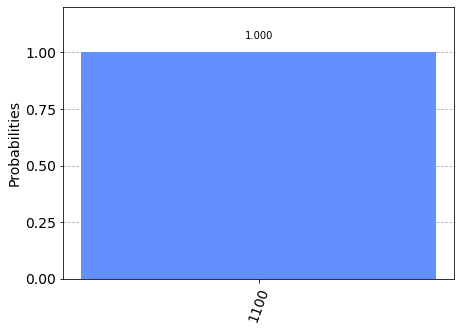

In [117]:
# Get an IonQ simulator backend to run circuits on:
backend = provider.get_backend("ionq_simulator")

# Then run the circuit:
job = backend.run(telephone(3,1), shots=1000)

#save job_id
job_id_trial = job.job_id()

# Fetch the result:
result = job.result()
# histogram
plot_histogram(result.get_counts())

In [71]:
qC=initialize(4)
entangle(qC,0,3).draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ H ├──┼──
     └───┘  │  
q_2: ───────┼──
          ┌─┴─┐
q_3: ─────┤ X ├
          └───┘
c: 4/══════════

In [50]:


# Create a bell state circuit.
qc = QuantumCircuit(6, 6)
qc.h(0)
qc.cx(0, 2)
#qc.h(0)
qc.cx(0, 3)
qc.measure([0,2,3],[0,2,3])
# Show the circuit:
qc.draw()

┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘  │    │     └╥┘   
q_1: ───────┼────┼──────╫────
          ┌─┴─┐  │  ┌─┐ ║    
q_2: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_3: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
q_4: ────────────────╫──╫──╫─
                     ║  ║  ║ 
q_5: ────────────────╫──╫──╫─
                     ║  ║  ║ 
c: 6/════════════════╩══╩══╩═
                     2  0  3

In [58]:
backend_sim = Aer.get_backend('statevector_simulator')
sim = execute(qc, backend_sim, shots=1000)
sim_result = sim.result()

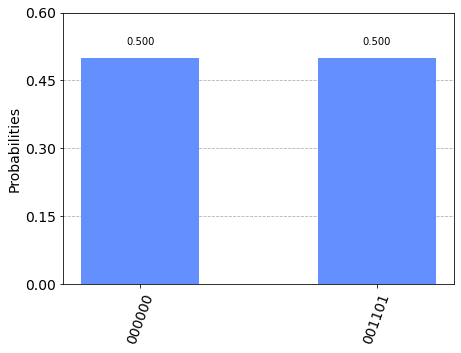

In [52]:
# Get an IonQ simulator backend to run circuits on:
backend = provider.get_backend("ionq_simulator")

# Then run the circuit:
job = backend.run(qc, shots=1000)

#save job_id
job_id_trial = job.job_id()

# Fetch the result:
result = job.result()
# histogram
plot_histogram(result.get_counts())

In [59]:
state_vec = sim_result.get_statevector()
entropy(state_vec)

0

In [30]:
DensityMatrix(state_vec)

DensityMatrix([[1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
               ...,
               [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2, 2, 2, 2, 2))

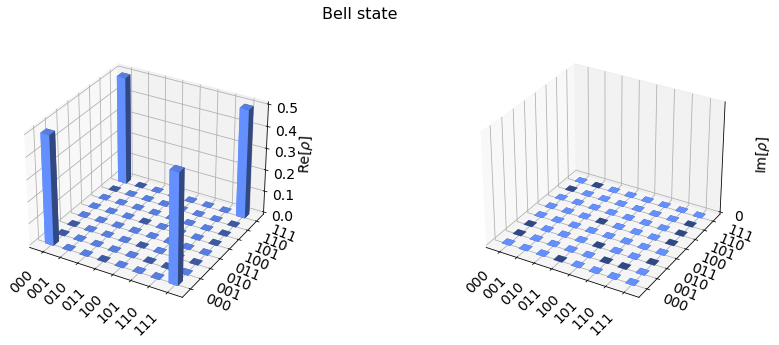

In [16]:
plot_state_city(state_vec, title='Bell state')

In [60]:
partial=partial_trace(state_vec,[0])
entropy(partial)

0.0